Includes:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import scipy.integrate

Data and plots for Figure 2. Figure 1 is a cartoon while Figures 3-5 were produced directly in the ParaView visualisation software from the ChemChaste simulation output. This output is fully producible using the RunChemChaste.py control file provided. 

Fisher-KPP equation definition as defined in the Manuscript:

In [2]:
def fisher_KPP(z,c,order=1):
    if order ==1:
        U = 1/(1+np.exp(z/c)) # first order
    elif order == 2:
        U = 1/(1+np.exp(z/c)) + (1/pow(c,2))*(np.exp(z/c)/pow((1+np.exp(z/c)),2))*np.log( 4*np.exp(z/c)/pow((1+np.exp(z/c)),2) )# second order
    else:
        U=0*z
    return U


def integrand(x, t):

    xdrift = 50
    a = 1.0
    c=a+(1/a)
    tscale = 1.0
    
    x=x+xdrift
    x=1.0*x
    z=x-c*t*tscale
    
    return fisher_KPP(z,c,order=2)

Solving the Fisher-KPP equation:

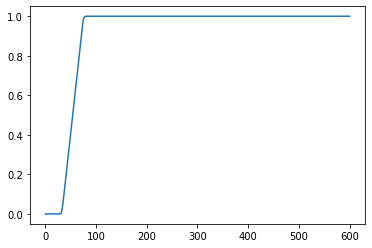

In [3]:
times2 = np.arange(0,201,1)*3.0
times1 = np.arange(0,61,1)*10.0
times = np.arange(0,601,1)
integralValues = []
integralValues1 = []
integralValues2 = []

for i in range(0,len(times)):
    t=times[i]
    #print(t)
    I = scipy.integrate.quad(integrand, 15, 100, args=(t) )
    integralValues.append( I[0]/85)
    
for i in range(0,len(times1)):
    t=times[i]
    #print(t)
    I = scipy.integrate.quad(integrand, 15, 100, args=(t) )
    integralValues1.append( I[0]/85)
    
for i in range(0,len(times2)):
    t=times[i]
    #print(t)
    I = scipy.integrate.quad(integrand, 15, 100, args=(t) )
    integralValues2.append( I[0]/85)
    
gradInt=  np.gradient(np.array(integralValues))
    
plt.plot(np.array(times),np.array(integralValues),label="Analytic",linestyle='solid')

Load and plot ParaView line output for Figure 2 a):

In [5]:
dfTrace2 = pd.read_csv("Fisher_Slice/160.csv");
dfTrace4 = pd.read_csv("Fisher_Slice/240.csv");
dfTrace6 = pd.read_csv("Fisher_Slice/320.csv");
dfTrace8 = pd.read_csv("Fisher_Slice/400.csv");

For Figure 2 a) plot the line output from ParaView against solution for Fisher-KPP

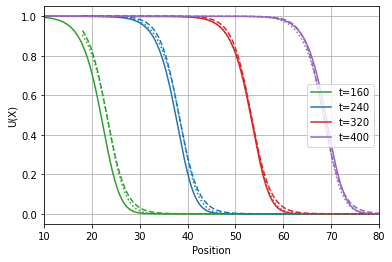

In [6]:
A=1
xsteps =np.arange(0,105,step=10)
xdrift = 8

tvec =[1,2,3,4]


colorVec=["tab:orange","tab:green","tab:blue","tab:red","tab:purple","tab:brown","tab:cyan"]

plt.plot(dfTrace2['arc_length'],dfTrace2['PDE variable 0'],label="t=160",color=colorVec[1]) 
plt.plot(dfTrace4['arc_length'],dfTrace4['PDE variable 0'],label="t=240",color=colorVec[2]) 
plt.plot(dfTrace6['arc_length'],dfTrace6['PDE variable 0'],label="t=320",color=colorVec[3])  
plt.plot(dfTrace8['arc_length'],dfTrace8['PDE variable 0'],label="t=400",color=colorVec[4]) 


x = np.arange(10, 80, 0.01) 
a = 1
c=a+(1/a)
tscale = 7.55

for tint in tvec:
    t=tint*tscale
    z=x-c*t
    
    plt.plot(x+xdrift, fisher_KPP(z,c,order=1),linestyle='dashed',color=colorVec[tint])
    plt.plot(x+xdrift, fisher_KPP(z,c,order=2),linestyle='dotted',color=colorVec[tint])

plt.xticks(xsteps);
plt.xlabel("X");
plt.ylabel("U(X)");
plt.legend(loc="right");
plt.xlabel("Position");
plt.xlim([10, 80])
plt.savefig('wavePlot.png')
plt.grid();

Full data processing from ParaView output for Figure 2 b)

In [44]:
dx = [1,0.8,0.6,0.4,0.2,0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001,0.0008,0.0006,0.0004,0.0002,0.0001]
dt = [0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001,0.0008,0.0006,0.0004,0.0002,0.0001]

filename_prefix_1 = "DataOut/"
filename_prefix_2 = "dx_"
filename_mid = "_dt_"
filename_suffix = ".csv"

files_exist = []
data_names = []
files_names = []
files_csv =[]
l2 = []
gradData = []

dt2=[0.1]
dx2 = [0.01]
for x in dx:
    for t in dt:    
        filename = filename_prefix_1+filename_prefix_2+str(x)+filename_mid+str(t)
        dataname = filename_prefix_2+str(x)+filename_mid+str(t)
        filename = filename.replace('.', '')
        filename = filename+filename_suffix
        try:
            df = pd.read_csv(filename)
            files_exist.append(True)
            data_names.append(dataname)
            files_names.append(filename)
            files_csv.append(df)
            l2.append(np.sum(np.power((np.array(integralValues)-df['avg(PDE variable 0)']),2)))
            gradData.append(np.gradient(np.array(df['avg(PDE variable 0)'])))
            print(filename)
        except:
            files_exist.append(False)
            files_names.append("")
            data_names.append("")
            files_csv.append("")
            l2.append(1)
            gradData.append(0)

DataOut/dx_1_dt_01.csv
DataOut/dx_1_dt_001.csv
DataOut/dx_1_dt_00001.csv
DataOut/dx_08_dt_01.csv
DataOut/dx_08_dt_008.csv
DataOut/dx_08_dt_006.csv
DataOut/dx_08_dt_004.csv
DataOut/dx_08_dt_002.csv
DataOut/dx_08_dt_001.csv
DataOut/dx_08_dt_0008.csv
DataOut/dx_08_dt_0006.csv
DataOut/dx_08_dt_0004.csv
DataOut/dx_08_dt_0002.csv
DataOut/dx_08_dt_0001.csv
DataOut/dx_08_dt_00008.csv
DataOut/dx_08_dt_00006.csv
DataOut/dx_08_dt_00004.csv
DataOut/dx_08_dt_00002.csv
DataOut/dx_08_dt_00001.csv
DataOut/dx_06_dt_01.csv
DataOut/dx_06_dt_008.csv
DataOut/dx_06_dt_006.csv
DataOut/dx_06_dt_004.csv
DataOut/dx_06_dt_002.csv
DataOut/dx_06_dt_001.csv
DataOut/dx_06_dt_0008.csv
DataOut/dx_06_dt_0006.csv
DataOut/dx_06_dt_0004.csv
DataOut/dx_06_dt_0002.csv
DataOut/dx_06_dt_0001.csv
DataOut/dx_06_dt_00008.csv
DataOut/dx_06_dt_00006.csv
DataOut/dx_06_dt_00004.csv
DataOut/dx_06_dt_00002.csv
DataOut/dx_06_dt_00001.csv
DataOut/dx_04_dt_01.csv
DataOut/dx_04_dt_008.csv
DataOut/dx_04_dt_006.csv
DataOut/dx_04_dt_004.csv


For Figure 2 b)

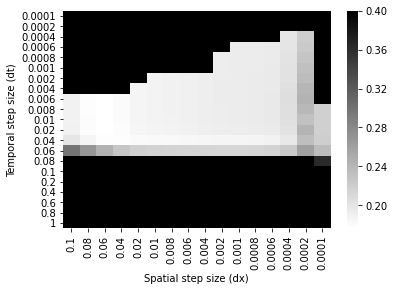

In [46]:

threshold = 0.4

X = list(set(dx))
T = list(set(dt))
X.sort()
T.sort()
M = np.ones((len(X),len(T)))*threshold

for i in range(0,len(X)):
    for j in range(0,len(T)):
        
        dataname = filename_prefix_2+str(X[i])+filename_mid+str(T[j])
        for k in range(0,len(data_names)):
            if data_names[k] == dataname:
                if l2[k]>threshold:
                    M[i,j]=threshold
                else:
                    M[i,j]=l2[k]
                    
ax = sns.heatmap(M, linewidth=0,yticklabels=X,xticklabels=T,cmap="gist_gray_r")
ax.invert_xaxis()
ax.set(xlabel="Spatial step size (dx)", ylabel = "Temporal step size (dt)")
plt.savefig('heatmap.png')
plt.show()

Processing for the data subset where $dt = 0.1$:

In [47]:
dx = [1,0.8,0.6,0.4,0.2,0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001,0.0008,0.0006,0.0004,0.0002,0.0001]
dt2=[0.1]

filename_prefix_1 = "DataOut/"
filename_prefix_2 = "dx_"
filename_mid = "_dt_"
filename_suffix = ".csv"

files_exist = []
data_names = []
files_names = []
files_csv =[]
l2 = []
gradData = []

for x in dx:
    for t in dt2:    
        filename = filename_prefix_1+filename_prefix_2+str(x)+filename_mid+str(t)
        dataname = filename_prefix_2+str(x)+filename_mid+str(t)
        filename = filename.replace('.', '')
        filename = filename+filename_suffix
        try:
            df = pd.read_csv(filename)
            files_exist.append(True)
            data_names.append(dataname)
            files_names.append(filename)
            files_csv.append(df)
            l2.append(np.sum(np.power((np.array(integralValues)-df['avg(PDE variable 0)']),2)))
            gradData.append(np.gradient(np.array(df['avg(PDE variable 0)'])))
            print(filename)
        except:
            files_exist.append(False)
            files_names.append("")
            data_names.append("")
            files_csv.append("")
            l2.append(1)
            gradData.append(0)

DataOut/dx_1_dt_01.csv
DataOut/dx_08_dt_01.csv
DataOut/dx_06_dt_01.csv
DataOut/dx_04_dt_01.csv
DataOut/dx_02_dt_01.csv
DataOut/dx_01_dt_01.csv
DataOut/dx_008_dt_01.csv
DataOut/dx_006_dt_01.csv
DataOut/dx_004_dt_01.csv
DataOut/dx_002_dt_01.csv
DataOut/dx_001_dt_01.csv
DataOut/dx_0008_dt_01.csv
DataOut/dx_0006_dt_01.csv


For Figure 2 c)

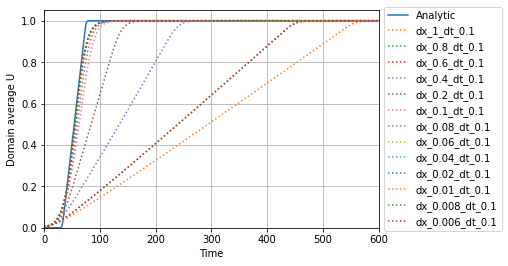

In [48]:
plt.plot(np.array(times),np.array(integralValues),label="Analytic",linestyle='solid')
for i in range(len(files_exist)):
    if files_exist[i] == True:
        #plt.plot(df[i]['Time'],df[i]['avg(PDE variable 0)'],label=files_names[i],linestyle='dotted')
        df = pd.read_csv(files_names[i])
        plt.plot(df['Time'],df['avg(PDE variable 0)'],label=data_names[i],linestyle='dotted')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Time")
plt.ylabel("Domain average U")
plt.xlim([0,600])
plt.ylim([0,1.05])
plt.grid()
plt.savefig('averagePlot.png')
plt.show()

For Figure 2 d)

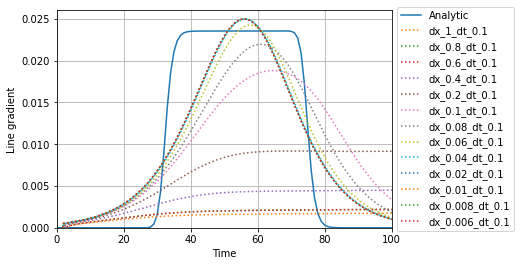

In [49]:
plt.plot(np.array(times),np.array(gradInt),label="Analytic",linestyle='solid')
for i in range(len(files_exist)):
    if files_exist[i] == True:
        #plt.plot(df[i]['Time'],df[i]['avg(PDE variable 0)'],label=files_names[i],linestyle='dotted')
        df = pd.read_csv(files_names[i])
        try:
            plt.plot(df['Time'],gradData[i],label=data_names[i],linestyle='dotted')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        except:
            print("skip")

plt.xlim([0,100])
plt.ylim([0,0.026])
plt.xlabel("Time")
plt.ylabel("Line gradient")
plt.grid() 
plt.savefig('gradientPlot.png')
plt.show()
